In [1]:
#conda install pandas

In [2]:
#conda install matplotlib

In [3]:
#conda install statsmodels

In [4]:
#conda install numpy

In [5]:
#conda install -c conda-forge yfinance

In [6]:
#pip install arch


In [7]:
#Necessary Librarie
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf
from arch import arch_model
from arch.__future__ import reindexing
import pymc3 as pm
import warnings

/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
#Defining Time Period and Tickers
start_date='2001-01-01'
end_date='2006-12-29'
ticker1='^GSPC'
ticker2='^FTSE'

In [9]:
#Downloading S&P 500 Adjusted Closing Price
SP500_Cprices= yf.download(ticker1,start_date,end_date)['Adj Close']
print(SP500_Cprices)

[*********************100%***********************]  1 of 1 completed
Date
2001-01-02    1283.270020
2001-01-03    1347.560059
2001-01-04    1333.339966
2001-01-05    1298.349976
2001-01-08    1295.859985
                 ...     
2006-12-21    1418.300049
2006-12-22    1410.760010
2006-12-26    1416.900024
2006-12-27    1426.839966
2006-12-28    1424.729980
Name: Adj Close, Length: 1506, dtype: float64


In [10]:
SP500_Cprices.to_csv("SP500_Cprices")

In [11]:
SP500=pd.read_csv("SP500_Cprices",index_col='Date')

In [12]:
SP500.rename(columns={'Adj Close': 'Close'}, inplace=True)

In [13]:
#Calculating S&P 500 Daily Returns
SP500['Return'] = 100 * SP500.Close.pct_change().dropna()

In [14]:
#Calculating Rolling Volatility for S&P 500 Returns
SP500['Volatility']=SP500['Return'].rolling(window=20).std().dropna()

In [15]:
SP500.dropna(inplace=True)

In [16]:
print(SP500)

                  Close    Return  Volatility
Date                                         
2001-01-31  1366.010010 -0.561971    1.440522
2001-02-01  1373.469971  0.546113    0.932184
2001-02-02  1349.469971 -1.747399    0.988457
2001-02-05  1354.310059  0.358666    0.759999
2001-02-06  1352.260010 -0.151372    0.758916
...                 ...       ...         ...
2006-12-21  1418.300049 -0.367395    0.527605
2006-12-22  1410.760010 -0.531625    0.535644
2006-12-26  1416.900024  0.435227    0.430006
2006-12-27  1426.839966  0.701527    0.446654
2006-12-28  1424.729980 -0.147878    0.411383

[1486 rows x 3 columns]


In [17]:
SP500.describe()

,Close,Return,Volatility
count,1486.000000,1486.000000,1486.000000
mean,1130.441347,0.008183,0.963996
std,139.949401,1.071506,0.478186
min,776.760010,-4.921561,0.381748
25%,1047.359985,-0.561134,0.610521
50%,1143.994995,0.046418,0.828471
75%,1229.867523,0.560631,1.138859
max,1427.089966,5.732729,3.051465


In [18]:
#Downloading FTSE 100 Adjusted Closing Price
FTSE_Cprices= yf.download(ticker2,start_date,end_date)['Adj Close']
print(FTSE_Cprices)

[*********************100%***********************]  1 of 1 completed
Date
2001-01-02    6174.700195
2001-01-03    6039.899902
2001-01-04    6185.600098
2001-01-05    6198.100098
2001-01-08    6149.600098
                 ...     
2006-12-20    6198.600098
2006-12-21    6183.700195
2006-12-22    6190.000000
2006-12-27    6245.200195
2006-12-28    6241.000000
Name: Adj Close, Length: 1515, dtype: float64


In [19]:
FTSE_Cprices.to_csv("FTSE_Cprices")

In [20]:
FTSE=pd.read_csv("FTSE_Cprices",index_col='Date')

In [21]:
FTSE.rename(columns={'Adj Close': 'Close'}, inplace=True)

In [22]:
#Calculating FTSE 100 Daily Returns
FTSE['Return'] = 100 * FTSE.Close.pct_change().dropna()

In [23]:
#Calculating Rolling Volatility for FTSE 100 Returns
FTSE['Volatility']=FTSE['Return'].rolling(window=20).std()

In [24]:
FTSE.dropna(inplace=True)

In [25]:
print(FTSE)

                  Close    Return  Volatility
Date                                         
2001-01-30  6334.500000  0.277030    1.041762
2001-01-31  6297.500000 -0.584103    0.907345
2001-02-01  6251.799805 -0.725688    0.767555
2001-02-02  6256.399902  0.073580    0.766806
2001-02-05  6269.200195  0.204595    0.741788
...                 ...       ...         ...
2006-12-20  6198.600098 -0.087039    0.554820
2006-12-21  6183.700195 -0.240375    0.552110
2006-12-22  6190.000000  0.101878    0.546775
2006-12-27  6245.200195  0.891764    0.494421
2006-12-28  6241.000000 -0.067255    0.479973

[1495 rows x 3 columns]


In [26]:
FTSE.describe()

,Close,Return,Volatility
count,1495.000000,1495.000000,1495.000000
mean,4948.443343,0.005646,0.981641
std,713.324202,1.135943,0.590805
min,3287.000000,-5.715481,0.303780
25%,4367.899902,-0.522699,0.575833
50%,4982.500000,0.040158,0.767555
75%,5528.449951,0.565259,1.153341
max,6334.500000,6.081530,3.377020


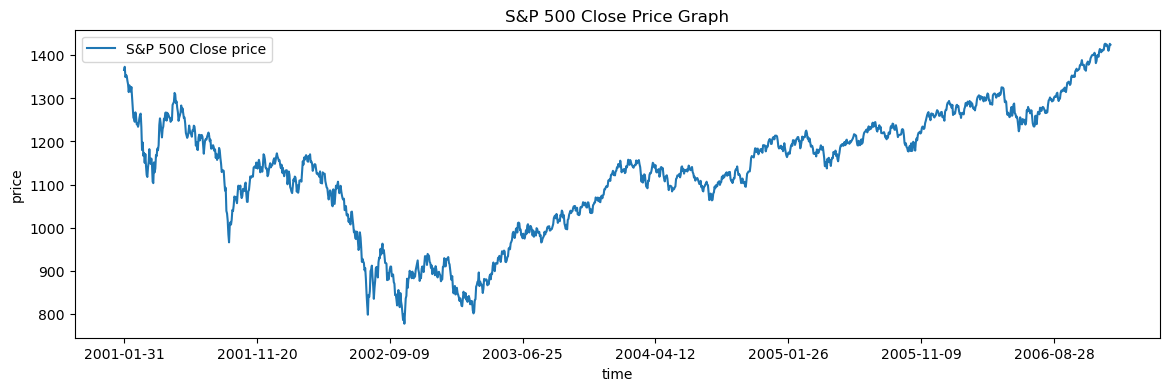

In [27]:
fig, ax = plt.subplots(figsize=(14, 4))
SP500.plot(y="Close", label="S&P 500 Close price", ax=ax)
ax.set(xlabel="time", ylabel="price")
ax.set_title("S&P 500 Close Price Graph")
ax.legend()
plt.show()

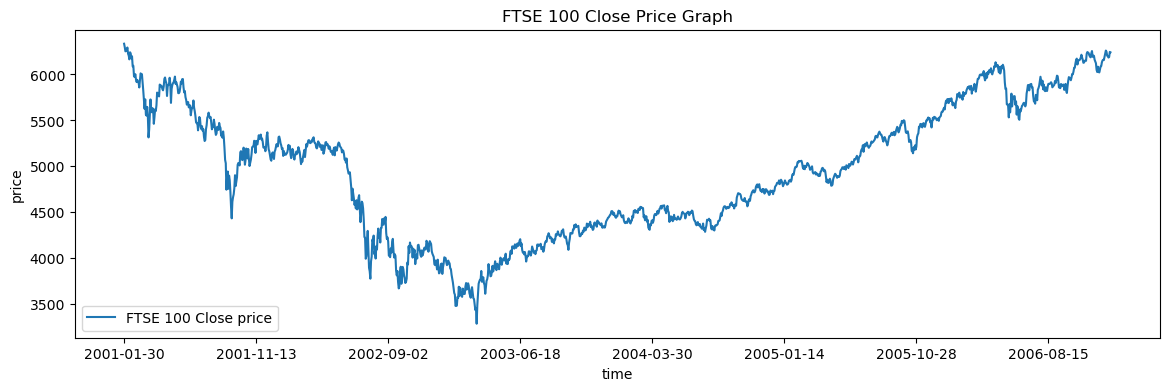

In [28]:
fig, ax = plt.subplots(figsize=(14, 4))
FTSE.plot(y="Close", label="FTSE 100 Close price", ax=ax)
ax.set(xlabel="time", ylabel="price")
ax.set_title("FTSE 100 Close Price Graph")
ax.legend()
plt.show()

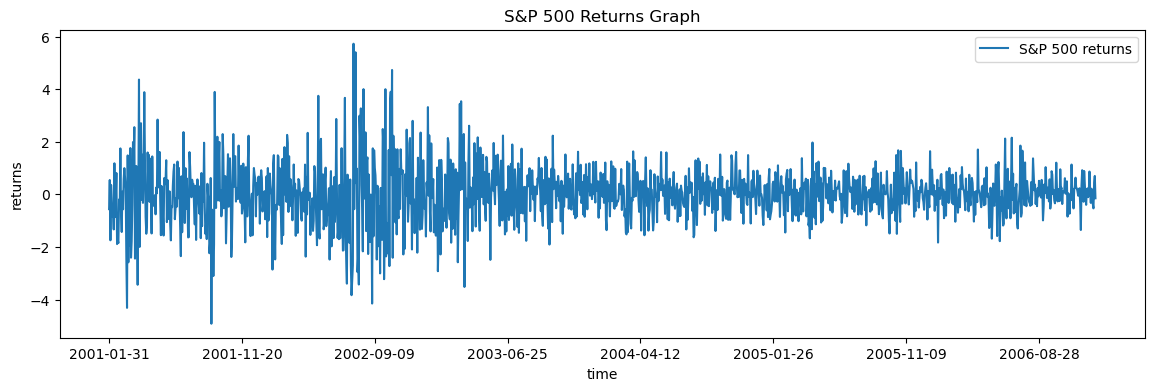

In [29]:
fig, ax = plt.subplots(figsize=(14, 4))
SP500.plot(y="Return", label="S&P 500 returns", ax=ax)
ax.set(xlabel="time", ylabel="returns")
ax.set_title("S&P 500 Returns Graph")
ax.legend()
plt.show()

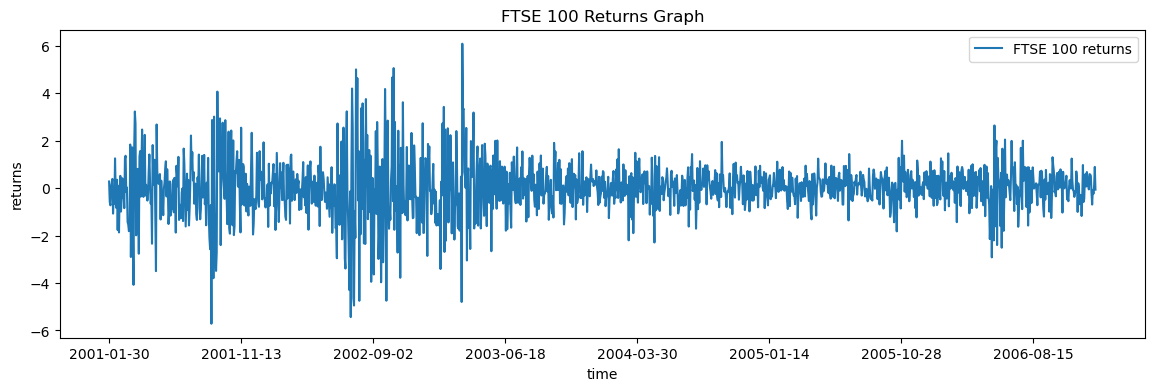

In [30]:
fig, ax = plt.subplots(figsize=(14, 4))
FTSE.plot(y="Return", label="FTSE 100 returns", ax=ax)
ax.set(xlabel="time", ylabel="returns")
ax.set_title("FTSE 100 Returns Graph")
ax.legend()
plt.show()

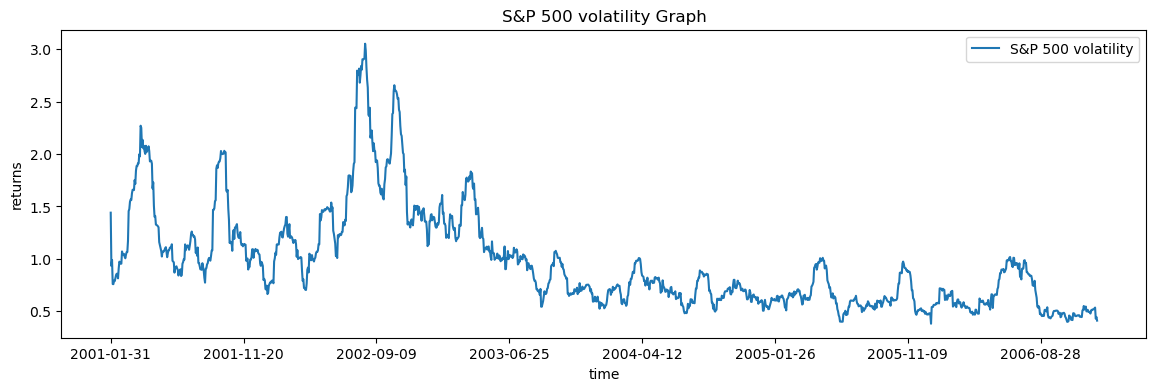

In [31]:
fig, ax = plt.subplots(figsize=(14, 4))
SP500.plot(y="Volatility", label="S&P 500 volatility", ax=ax)
ax.set(xlabel="time", ylabel="returns")
ax.set_title("S&P 500 volatility Graph")
ax.legend()
plt.show()

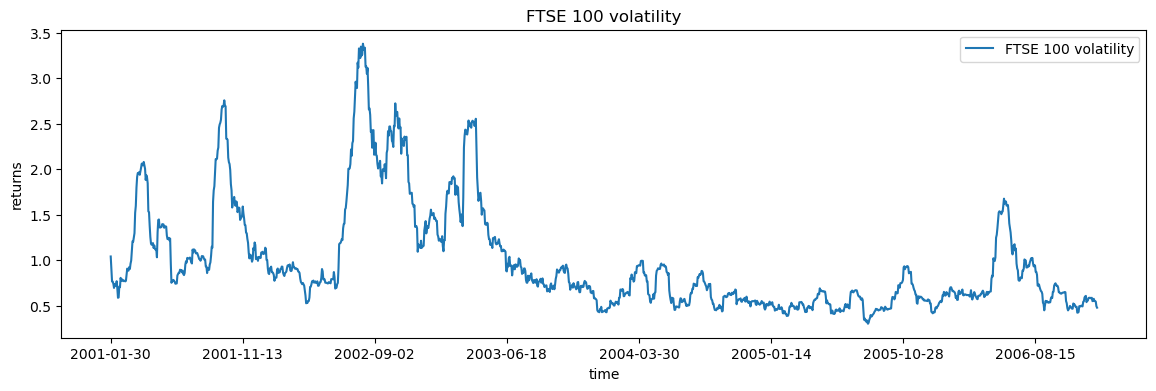

In [32]:
fig, ax = plt.subplots(figsize=(14, 4))
FTSE.plot(y="Volatility", label="FTSE 100 volatility", ax=ax)
ax.set(xlabel="time", ylabel="returns")
ax.set_title("FTSE 100 volatility")
ax.legend()
plt.show()

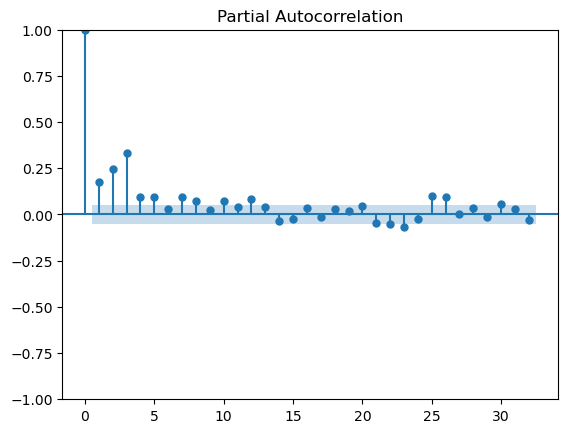

In [33]:
plot_pacf(SP500.Return**2)
plt.show()

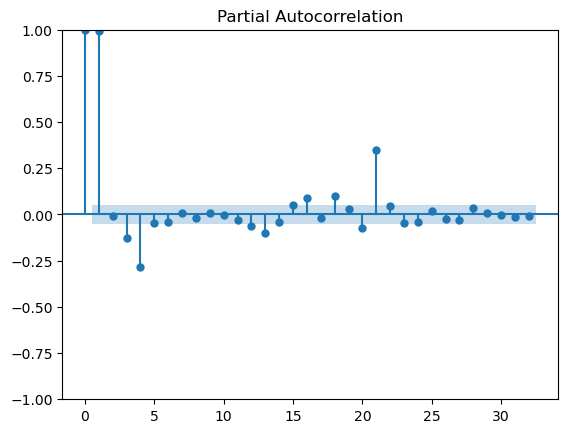

In [34]:
plot_pacf(SP500.Volatility**2)
plt.show()

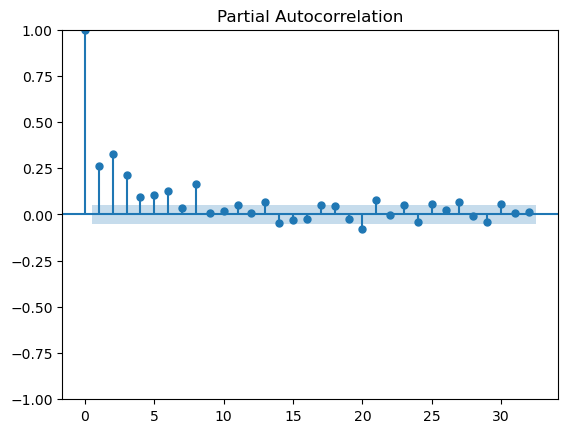

In [35]:
plot_pacf(FTSE.Return**2)
plt.show()

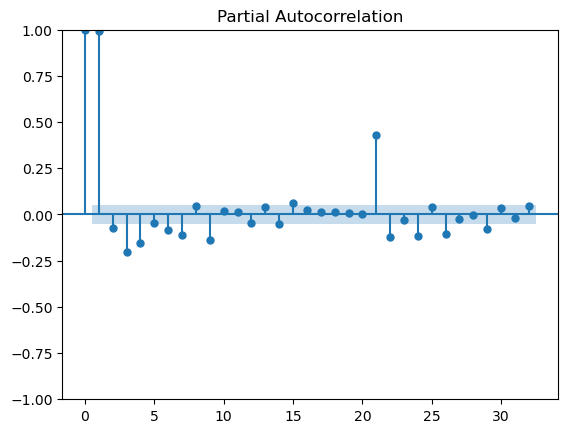

In [36]:
plot_pacf(FTSE.Volatility**2)
plt.show()

In [37]:
test_size1 = 10

In [38]:
test_size2 = 10

In [39]:
train1, test1 = SP500.Return[:-test_size1], SP500.Return[-test_size1:]

In [40]:
train2, test2 = FTSE.Return[:-test_size2], FTSE.Return[-test_size2:]

In [41]:
SP500_model_garch= arch_model(train1,vol="GARCH",p=1,q=1,dist='t')
SP500_results_garch=SP500_model_garch.fit(update_freq=5)
SP500_results_garch.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 2458.082939759959
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1956.1415965755011
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1956.1351793295635
            Iterations: 14
            Function evaluations: 97
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1956.14
Distribution:      Standardized Student's t   AIC:                           3922.27
Method:                  Maximum Likelihood   BIC:                           3948.76
                                              No. Observations:                 1476
Date:                      Tue, Sep 05 2023   Df Residuals:                     1475
Time:                              22:16:26   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0406  2.050e-02      1.982  4.744e-02 [4.591e-04,8.081e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.1805e-03  3.300e-03      1.570      0.117 [-1.288e-03,1.165e-02]
alpha[1]       0.0588  1.415e-02      4.158  3.212e-05  [3.111e-02,8.658e-02]
beta[1]        0.9355  1.519e-02     61.587      0.000      [  0.906,  0.965]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu            18.5108      8.342      2.219  2.648e-02 [  2.161, 34.860]
========================================================================

Covariance estimator: robust
"""

In [42]:

from pandas.tseries.offsets import BDay
predictions1 = SP500_results_garch.forecast(horizon=7)
future_dates1 = [pd.to_datetime(train1.index[-1]) + BDay(i) for i in range(1,8)]
pred1 = pd.Series(np.sqrt(predictions1.variance.values[-1,:]), index=future_dates1)

Text(0.5, 1.0, 'Volatility Prediction S&P 500- Next 7 Days')

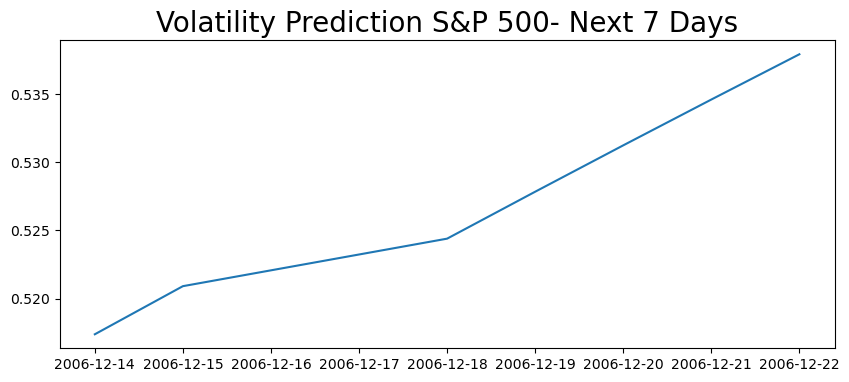

In [43]:
plt.figure(figsize=(10,4))
plt.plot(pred1)
plt.title('Volatility Prediction S&P 500- Next 7 Days', fontsize=20)

Text(0.5, 1.0, 'Returns S&P 500- Next 7 Days')

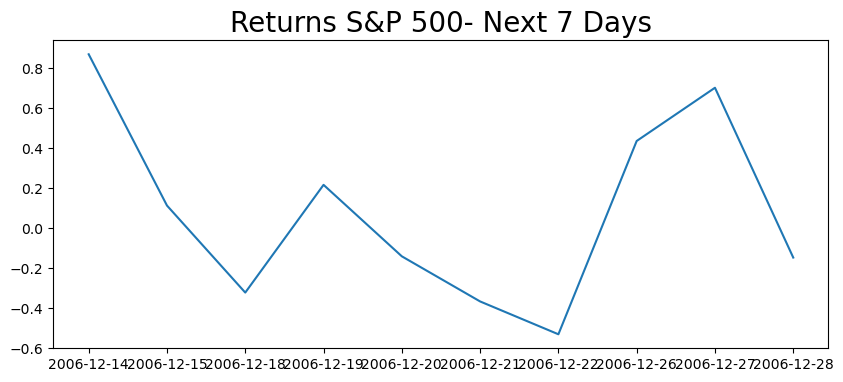

In [44]:
plt.figure(figsize=(10,4))
plt.plot(SP500.Return[-test_size1:])
plt.title('Returns S&P 500- Next 7 Days', fontsize=20)

Text(0.5, 1.0, 'Actual volatility S&P 500- Next 7 Days')

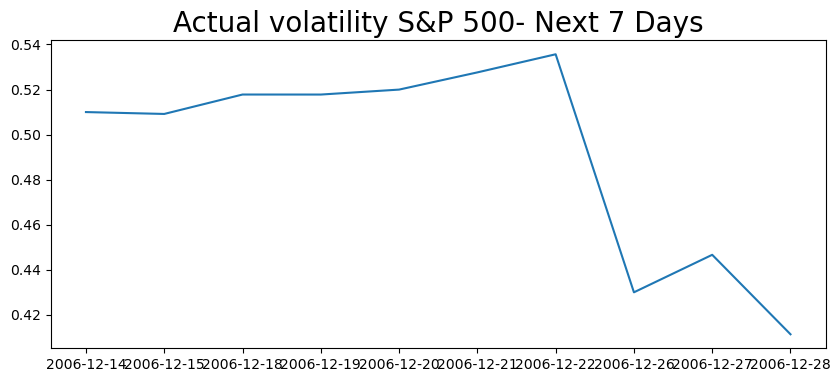

In [45]:
plt.figure(figsize=(10,4))
plt.plot(SP500.Volatility[-test_size1:])
plt.title('Actual volatility S&P 500- Next 7 Days', fontsize=20)

In [46]:
FTSE_model_garch= arch_model(train2[1:],vol="GARCH",p=1,q=1,dist='t')
FTSE_results_garch=FTSE_model_garch.fit(update_freq=5)
FTSE_results_garch.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 2044.527028977806
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1939.5715269719817
Iteration:     15,   Func. Count:    102,   Neg. LLF: 1939.4934881784488
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1939.493488178449
            Iterations: 15
            Function evaluations: 102
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1939.49
Distribution:      Standardized Student's t   AIC:                           3888.99
Method:                  Maximum Likelihood   BIC:                           3915.50
                                              No. Observations:                 1484
Date:                      Tue, Sep 05 2023   Df Residuals:                     1483
Time:                              22:16:27   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0425  1.893e-02      2.246  2.472e-02 [5.411e-03,7.961e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  4.427e-03      2.457  1.402e-02 [2.199e-03,1.955e-02]
alpha[1]       0.1035  1.934e-02      5.352  8.677e-08   [6.562e-02,  0.141]
beta[1]        0.8871  2.004e-02     44.255      0.000     [  0.848,  0.926]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu            22.2402     11.284      1.971  4.873e-02 [  0.124, 44.357]
========================================================================

Covariance estimator: robust
"""

In [47]:
predictions2 = FTSE_results_garch.forecast(horizon=7)
future_dates2 = [pd.to_datetime(train2.index[-1]) + timedelta(days=i) for i in range(1,8)]
pred2 = pd.Series(np.sqrt(predictions2.variance.values[-1,:]), index=future_dates2)

Text(0.5, 1.0, 'Volatility Prediction FTSE 100 - Next 7 Days')

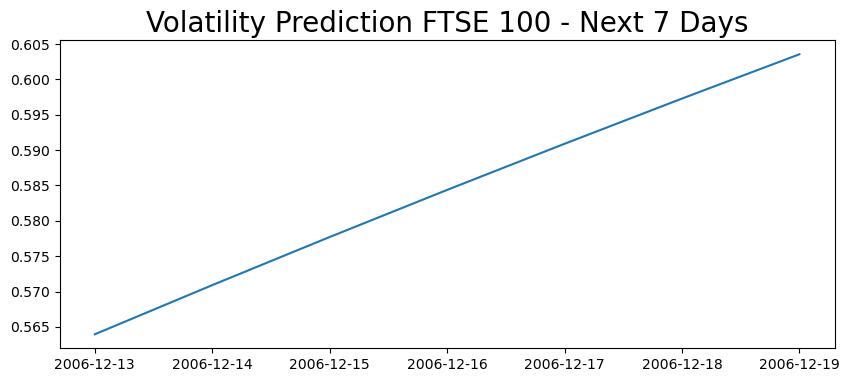

In [48]:

plt.figure(figsize=(10,4))
plt.plot(pred2)
plt.title('Volatility Prediction FTSE 100 - Next 7 Days', fontsize=20)

Text(0.5, 1.0, 'Returns FTSE 100 - Next 7 Days')

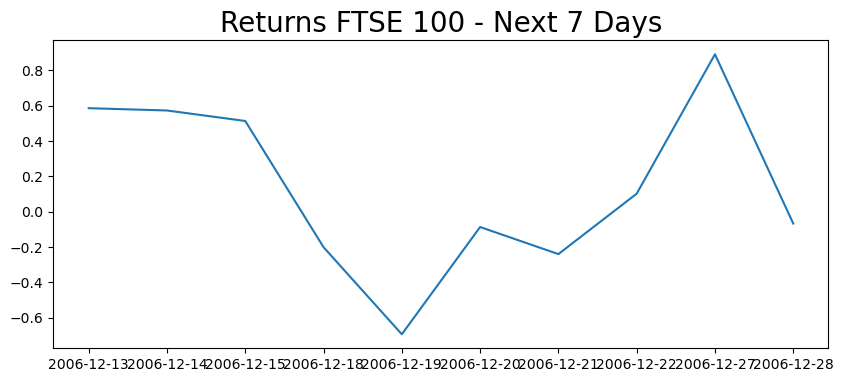

In [49]:
plt.figure(figsize=(10,4))
plt.plot(FTSE.Return[-test_size1:])
plt.title('Returns FTSE 100 - Next 7 Days', fontsize=20)

Text(0.5, 1.0, 'Actula volatility FTSE 100 - Next 7 Days')

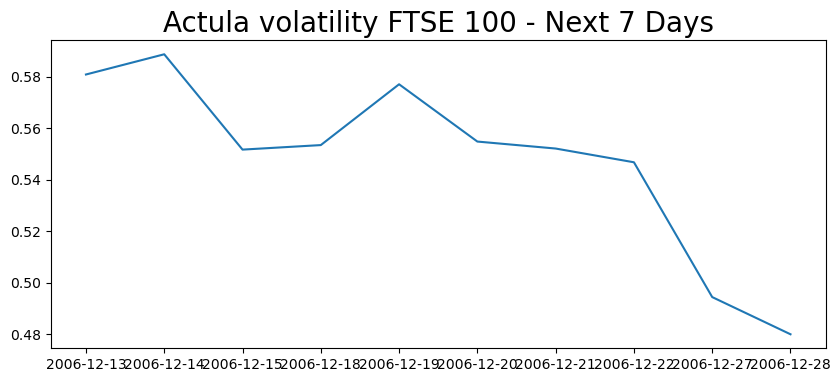

In [50]:
plt.figure(figsize=(10,4))
plt.plot(FTSE.Volatility[-test_size1:])
plt.title('Actula volatility FTSE 100 - Next 7 Days', fontsize=20)

In [179]:
test_size1 = 10

In [180]:
test_size2 = 10

In [181]:
train1, test1 = SP500.Return[:-test_size1], SP500.Return[-test_size1:]

In [282]:
train2, test2 = FTSE.Return[:-test_size2], FTSE.Return[-test_size2:]

In [283]:
from scipy.stats import t
df1, loc, scale = t.fit(train1)
print(df1)
df2, loc, scale = t.fit(train2)
print(df2)

3.8856867185932105
2.961696624786027


In [284]:
rolling_predictions1 = []
n_samples = 50
# Loop through the test size
for i in range(test_size1):
    # Use observed returns for the first iteration
    if i == 0:
        train_data = SP500.Return[:-test_size1]
    else:
        # Concatenate observed returns with simulated return for subsequent iterations
        train_data = np.append(SP500.Return[:-test_size1], simulated_return)

    # Train GARCH(1,1) model
    model = arch_model(train_data, p=1, q=1)
    model_fit = model.fit(disp='off', update_freq=5)
    pred = model_fit.forecast(horizon=1)
    predicted_volatility = np.sqrt(pred.variance.values[-1,:][0])
    
    # Generate simulated return using forecasted volatility
    previous_return = train_data[-1]
    
    posilble_return = np.zeros(n_samples)
    
    for j in range(n_samples):
        posilble_return[j] = previous_return + t.rvs(df=df1, loc=0, scale=predicted_volatility)
    simulated_return=np.mean(posilble_return)

    # Append predicted volatility
    rolling_predictions1.append(predicted_volatility)

In [285]:
rolling_predictions1 = pd.Series(rolling_predictions1, index=SP500.Return.index[-test_size1:])

percent_Return=SP500.Return[-test_size1:]
percent_Volatility=SP500.Volatility[-test_size1:]
scaling_factor = 100 
rolling_predictions1=np.log1p(1 + rolling_predictions1 * scaling_factor)
SP500_Actual_test_Return=np.log1p(1 + percent_Return * scaling_factor)
SP500_Actual_test_Volatility=np.log1p(1 + percent_Volatility * scaling_factor)

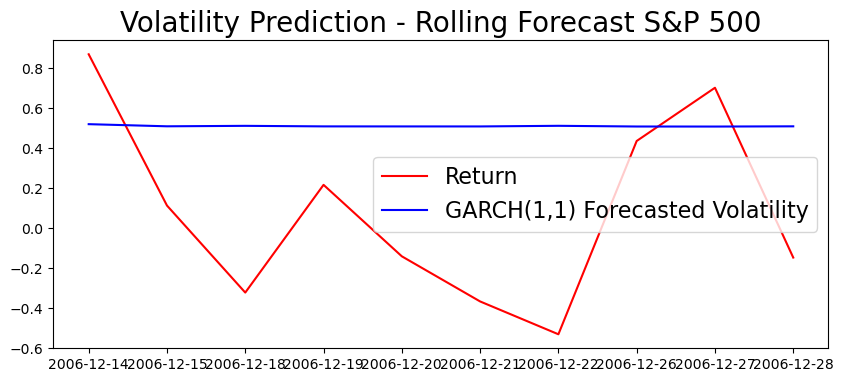

In [286]:
plt.figure(figsize=(10,4))
true, = plt.plot(SP500.Return[-test_size1:],color='red')
preds, = plt.plot(rolling_predictions1,color='blue')
plt.title('Volatility Prediction - Rolling Forecast S&P 500', fontsize=20)
plt.legend(['Return', 'GARCH(1,1) Forecasted Volatility'], fontsize=16)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2006-12-14'),
  Text(1, 0, '2006-12-15'),
  Text(2, 0, '2006-12-18'),
  Text(3, 0, '2006-12-19'),
  Text(4, 0, '2006-12-20'),
  Text(5, 0, '2006-12-21'),
  Text(6, 0, '2006-12-22'),
  Text(7, 0, '2006-12-26'),
  Text(8, 0, '2006-12-27'),
  Text(9, 0, '2006-12-28')])

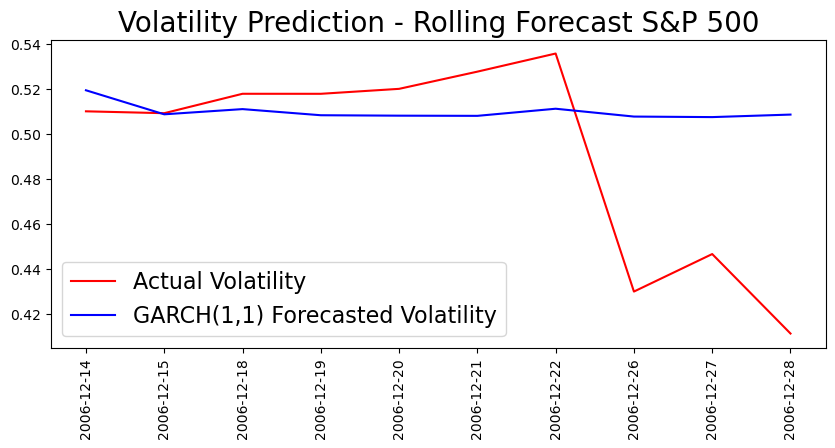

In [287]:
plt.figure(figsize=(10,4))
true, = plt.plot(SP500.Volatility[-test_size1:],color='red')
preds, = plt.plot(rolling_predictions1,color='blue')
plt.title('Volatility Prediction - Rolling Forecast S&P 500', fontsize=20)
plt.legend(['Actual Volatility', 'GARCH(1,1) Forecasted Volatility'], fontsize=16)
plt.xticks(rotation='vertical')

In [288]:
rolling_predictions2 = []
n_samples = 50
# Loop through the test size
for i in range(test_size2):
    # Use observed returns for the first iteration
    if i == 0:
        train_data = FTSE.Return[:-test_size2]
    else:
        # Concatenate observed returns with simulated return for subsequent iterations
        train_data = np.append(FTSE.Return[:-test_size2], simulated_return)

    # Train GARCH(1,1) model
    model = arch_model(train_data, p=1, q=1)
    model_fit = model.fit(disp='off', update_freq=5)
    pred = model_fit.forecast(horizon=1)
    predicted_volatility = np.sqrt(pred.variance.values[-1,:][0])
    
    # Generate simulated return using forecasted volatility
    previous_return = train_data[-1]
    
    posilble_return = np.zeros(n_samples)
    
    for j in range(n_samples):
        posilble_return[j] = previous_return + t.rvs(df=df2, loc=0, scale=predicted_volatility)
    simulated_return=np.mean(posilble_return)

    # Append predicted volatility
    rolling_predictions2.append(predicted_volatility)

In [289]:
rolling_predictions2 = pd.Series(rolling_predictions2, index=FTSE.Return.index[-test_size2:])

scaling_factor = 100 
rolling_predictions1=np.log(1 + rolling_predictions1 * scaling_factor)
FTSE_Actual_test_Return=np.log(1 + FTSE.Return[-test_size1:] * scaling_factor)
FTSE_Actual_test_Volatility=np.log(1 + FTSE.Volatility[-test_size1:] * scaling_factor)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2006-12-13'),
  Text(1, 0, '2006-12-14'),
  Text(2, 0, '2006-12-15'),
  Text(3, 0, '2006-12-18'),
  Text(4, 0, '2006-12-19'),
  Text(5, 0, '2006-12-20'),
  Text(6, 0, '2006-12-21'),
  Text(7, 0, '2006-12-22'),
  Text(8, 0, '2006-12-27'),
  Text(9, 0, '2006-12-28')])

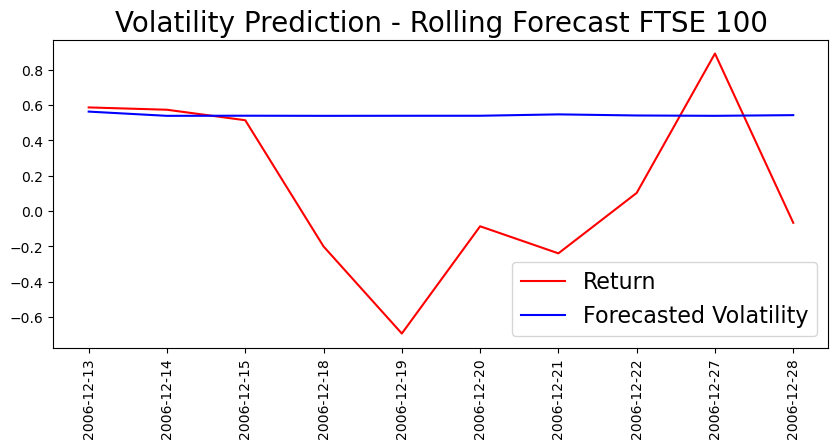

In [290]:
plt.figure(figsize=(10,4))
true, = plt.plot(FTSE.Return[-test_size2:],color='red')
preds, = plt.plot(rolling_predictions2,color='blue')
plt.title('Volatility Prediction - Rolling Forecast FTSE 100', fontsize=20)
plt.legend(['Return', 'Forecasted Volatility'], fontsize=16)
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2006-12-13'),
  Text(1, 0, '2006-12-14'),
  Text(2, 0, '2006-12-15'),
  Text(3, 0, '2006-12-18'),
  Text(4, 0, '2006-12-19'),
  Text(5, 0, '2006-12-20'),
  Text(6, 0, '2006-12-21'),
  Text(7, 0, '2006-12-22'),
  Text(8, 0, '2006-12-27'),
  Text(9, 0, '2006-12-28')])

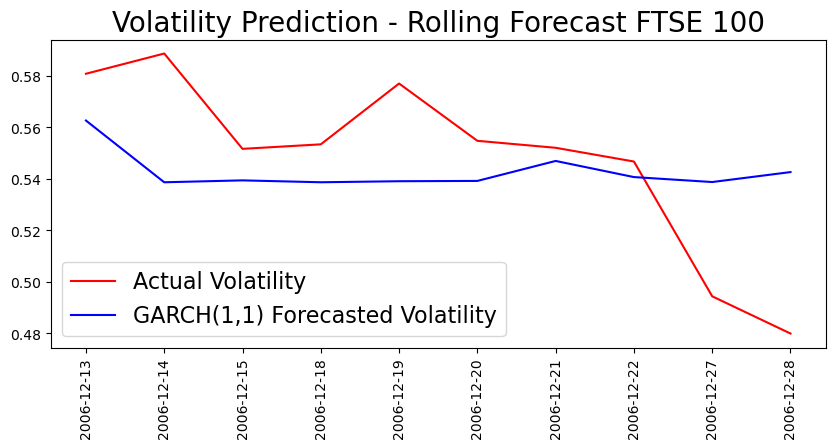

In [291]:
plt.figure(figsize=(10,4))
true, = plt.plot(FTSE.Volatility[-test_size2:],color='red')
preds, = plt.plot(rolling_predictions2,color='blue')
plt.title('Volatility Prediction - Rolling Forecast FTSE 100', fontsize=20)
plt.legend(['Actual Volatility', 'GARCH(1,1) Forecasted Volatility'], fontsize=16)
plt.xticks(rotation='vertical')

In [271]:
def mean_squared_error(actual, predicted):
    """
    Calculate the Mean Squared Error (MSE) between actual and predicted values.

    Parameters:
    actual (numpy array or list): Array of actual values.
    predicted (numpy array or list): Array of predicted values.

    Returns:
    float: Mean Squared Error (MSE).
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    mse = np.mean((actual - predicted) ** 2)
    return mse

In [272]:
def root_mean_squared_error(actual, predicted):
    """
    Calculate the Root Mean Squared Error (RMSE) between actual and predicted values.

    Parameters:
    actual (numpy array or list): Array of actual values.
    predicted (numpy array or list): Array of predicted values.

    Returns:
    float: Root Mean Squared Error (RMSE).
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [273]:
def mean_absolute_error(actual, predicted):
    """
    Calculate the Mean Absolute Error (MAE) between actual and predicted values.

    Parameters:
    actual (numpy array or list): Array of actual values.
    predicted (numpy array or list): Array of predicted values.

    Returns:
    float: Mean Absolute Error (MAE).
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    mae = np.mean(np.abs(actual - predicted))
    return mae

In [274]:
mse = mean_squared_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("Mean Squared Error (MSE) S&P 500:", mse)
rmse = root_mean_squared_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("Root Mean Squared Error (RMSE) S&P 500:", rmse)
mae = mean_absolute_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("Mean Absolute Error (MAE) S&P 500:", mae)

Mean Squared Error (MSE) S&P 500: 0.002388278563761316
Root Mean Squared Error (RMSE) S&P 500: 0.048870017022314576
Mean Absolute Error (MAE) S&P 500: 0.03451516003232726


In [275]:
mse = mean_squared_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("Mean Squared Error (MSE) FTSE 100:", mse)
rmse = root_mean_squared_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("Root Mean Squared Error (RMSE) FTSE 100:", rmse)
mae = mean_absolute_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("Mean Absolute Error (MAE) FTSE 100:", mae)

Mean Squared Error (MSE) FTSE 100: 0.0013342138316381745
Root Mean Squared Error (RMSE) FTSE 100: 0.036526891896767985
Mean Absolute Error (MAE) FTSE 100: 0.028937647416747342


In [68]:
# Calculate log returns
SP500_Logreturns = np.log(SP500['Close'] / SP500['Close'].shift(1)).dropna()

In [69]:
SP500_train = SP500_Logreturns[:-10]
SP500_test = SP500_Logreturns[-10:]

In [70]:
Avolatility=SP500_Logreturns.rolling(window=20).std().dropna()

In [71]:
SP500_test_volatility=Avolatility[-len(SP500_test):]

In [72]:
print(SP500_test_volatility)

Date
2006-12-14    0.005105
2006-12-15    0.005096
2006-12-18    0.005182
2006-12-19    0.005182
2006-12-20    0.005204
2006-12-21    0.005280
2006-12-22    0.005360
2006-12-26    0.004291
2006-12-27    0.004456
2006-12-28    0.004106
Name: Close, dtype: float64


In [73]:
n_samples = 2000
n_forecast = len(SP500_test)

In [74]:
SP500_forecasted_volatility = np.zeros(n_forecast)
forecasted_returns = np.zeros(n_forecast)

In [75]:

for i in range(n_forecast):
    model = pm.Model()
    with model:
        sigma = pm.Exponential('sigma', 50.)
        nu = pm.Exponential('nu', .1)
        s = pm.GaussianRandomWalk('s', sd=sigma, shape=len(SP500_train) + i)
        r = pm.StudentT('r', nu=nu, lam=pm.math.exp(-2*s), observed=np.concatenate([SP500_train, forecasted_returns[:i]]))

    with model:
        trace = pm.sample(n_samples)

    s_current = trace['s'][:, -1].mean()  # estimate current volatility state
    
    forecast_samples = np.zeros(n_samples)
    
    for j in range(n_samples):
        sigma = trace['sigma'][j]
        nu = trace['nu'][j]
        s_next = np.random.normal(loc=s_current, scale=sigma)
        r_next = np.random.standard_t(nu) * np.exp(s_next)
        forecast_samples[j] = r_next
    forecasted_returns[i] = np.mean(forecast_samples)
    SP500_forecasted_volatility[i] = np.std(forecast_samples)

/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.war

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 241 seconds.
The acceptance probability does not match the target. It is 0.6725949953499242, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-pac

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 263 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 279 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 280 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 283 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 266 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 262 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 244 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 266 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/3227835613.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 253 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


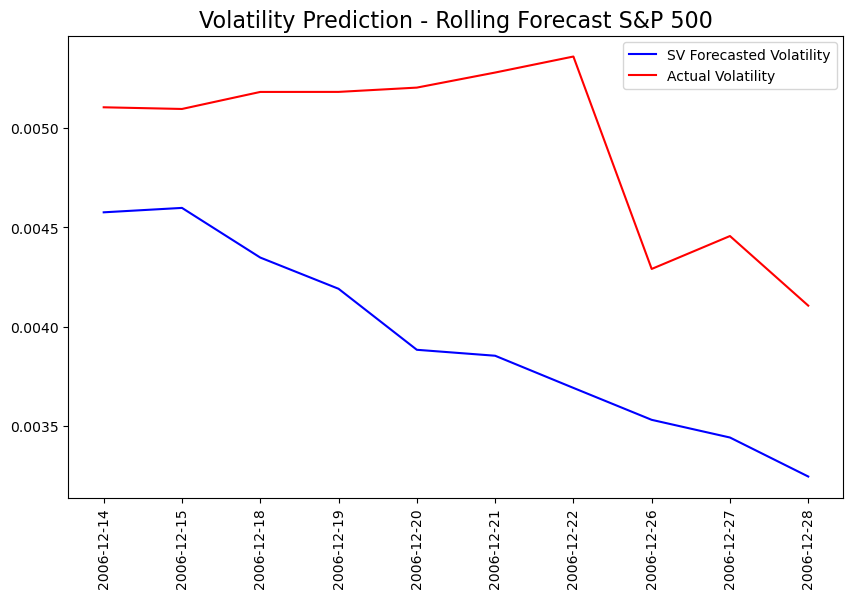

In [76]:
# Plot the forecasted and actual volatility

plt.figure(figsize=(10, 6))
plt.plot(SP500_test.index, SP500_forecasted_volatility, label='SV Forecasted Volatility',color='blue')
plt.plot(SP500_test.index, SP500_test_volatility, label='Actual Volatility',color='red')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Volatility Prediction - Rolling Forecast S&P 500', fontsize=16)
plt.show()

In [77]:
mse = mean_squared_error(SP500_test_volatility, SP500_forecasted_volatility)
print("Mean Squared Error (MSE) S&P 500:", mse)
rmse = root_mean_squared_error(SP500_test_volatility, SP500_forecasted_volatility)
print("Root Mean Squared Error (RMSE) S&P 500:", rmse)
mae = mean_absolute_error(SP500_test_volatility, SP500_forecasted_volatility)
print("Mean Absolute Error (MAE) S&P 500:", mae)

Mean Squared Error (MSE) S&P 500: 1.1114191562002908e-06
Root Mean Squared Error (RMSE) S&P 500: 0.0010542386618789365
Mean Absolute Error (MAE) S&P 500: 0.000990215400158403


In [78]:
# Calculate log returns
FTSE_Logreturns = np.log(FTSE['Close'] / FTSE['Close'].shift(1)).dropna()

In [79]:
FTSE_train = FTSE_Logreturns[:-10]
FTSE_test = FTSE_Logreturns[-10:]

In [80]:
Avolatility=FTSE_Logreturns.rolling(window=20).std().dropna()

In [81]:
FTSE_test_volatility=Avolatility[-len(FTSE_test):]

In [82]:
print(FTSE_test_volatility)

Date
2006-12-13    0.005815
2006-12-14    0.005893
2006-12-15    0.005520
2006-12-18    0.005537
2006-12-19    0.005774
2006-12-20    0.005551
2006-12-21    0.005523
2006-12-22    0.005471
2006-12-27    0.004937
2006-12-28    0.004793
Name: Close, dtype: float64


In [83]:
n_samples = 2000
n_forecast = len(FTSE_test)

In [84]:
FTSE_forecasted_volatility = np.zeros(n_forecast)
forecasted_returns = np.zeros(n_forecast)

In [85]:
for i in range(n_forecast):
    model = pm.Model()
    with model:
        sigma = pm.Exponential('sigma', 50.)
        nu = pm.Exponential('nu', .1)
        s = pm.GaussianRandomWalk('s', sd=sigma, shape=len(FTSE_train) + i)
        r = pm.StudentT('r', nu=nu, lam=pm.math.exp(-2*s), observed=np.concatenate([FTSE_train, forecasted_returns[:i]]))

    with model:
        trace = pm.sample(n_samples)

    s_current = trace['s'][:, -1].mean()  # estimate current volatility state
    
    forecast_samples = np.zeros(n_samples)
    
    for j in range(n_samples):
        sigma = trace['sigma'][j]
        nu = trace['nu'][j]
        s_next = np.random.normal(loc=s_current, scale=sigma)
        r_next = np.random.standard_t(nu) * np.exp(s_next)
        forecast_samples[j] = r_next
    forecasted_returns[i] = np.mean(forecast_samples)
    FTSE_forecasted_volatility[i] = np.std(forecast_samples)

/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.war

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 165 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 163 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 165 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 161 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 164 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 161 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 159 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 162 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 158 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_15940/4178503461.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 158 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


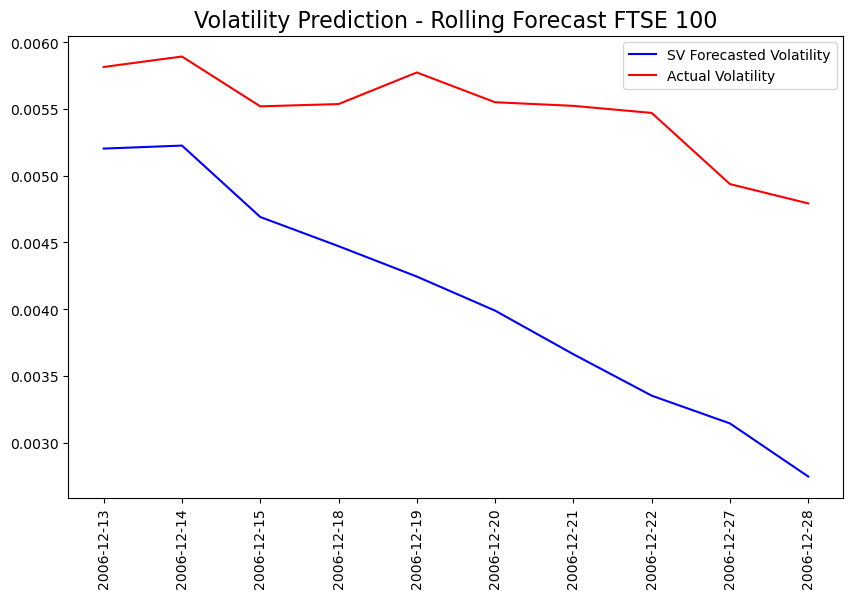

In [86]:
# Plot the forecasted and actual volatility

plt.figure(figsize=(10, 6))
plt.plot(FTSE_test.index, FTSE_forecasted_volatility, label='SV Forecasted Volatility',color='blue')
plt.plot(FTSE_test.index, FTSE_test_volatility, label='Actual Volatility', color='red')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Volatility Prediction - Rolling Forecast FTSE 100', fontsize=16)
plt.show()

In [87]:
mse = mean_squared_error(FTSE_test_volatility, FTSE_forecasted_volatility)
print("Mean Squared Error (MSE) FTSE 100:", mse)
rmse = root_mean_squared_error(FTSE_test_volatility, FTSE_forecasted_volatility)
print("Root Mean Squared Error (RMSE) FTSE 100:", rmse)
mae = mean_absolute_error(FTSE_test_volatility, FTSE_forecasted_volatility)
print("Mean Absolute Error (MAE) FTSE 100:", mae)

Mean Squared Error (MSE) FTSE 100: 2.276163392773525e-06
Root Mean Squared Error (RMSE) FTSE 100: 0.001508695924556544
Mean Absolute Error (MAE) FTSE 100: 0.0014079316443367197


In [249]:
print(SP500_forecasted_volatility)

[0.00457585 0.00459808 0.00434799 0.00419082 0.00388362 0.00385366
 0.00369168 0.0035309  0.00344184 0.00324542]


In [250]:
# Convert log volatilities to percentage volatilities
SP500_percentage_forecasted = 100 * (np.exp(SP500_forecasted_volatility) - 1)

In [251]:
print(SP500_percentage_forecasted)

[0.45863319 0.46086698 0.4357461  0.41996175 0.38911734 0.38610916
 0.36985021 0.35371455 0.3447774  0.32506939]


In [252]:
# Convert log volatilities to percentage volatilities
SP500_percentage_Actual = 100* (np.exp(SP500_test_volatility) - 1)

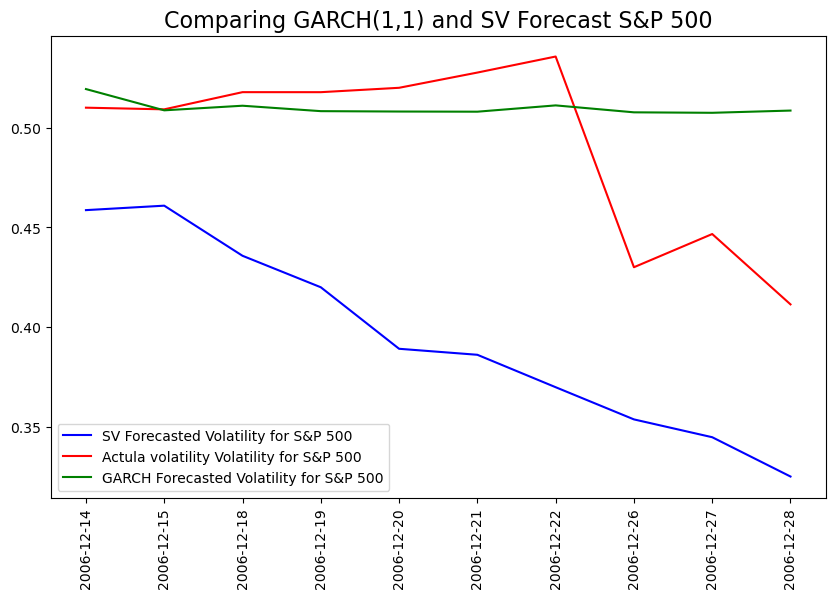

In [292]:
# Plot the forecasted and actual volatility

plt.figure(figsize=(10, 6))
plt.plot(SP500_test.index, SP500_percentage_forecasted, label='SV Forecasted Volatility for S&P 500', color='blue')
#plt.plot(SP500_test.index, SP500_percentage_Actual, label='log volatility to actual volatility')
plt.plot(SP500_test.index, SP500.Volatility[-test_size1:], label='Actula volatility Volatility for S&P 500', color='red')
plt.plot(SP500_test.index, rolling_predictions1, label='GARCH Forecasted Volatility for S&P 500', color='green')
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Comparing GARCH(1,1) and SV Forecast S&P 500', fontsize=16)
plt.show()

In [293]:
mse = mean_squared_error(SP500_percentage_Actual, SP500_percentage_forecasted)
print("SV Mean Squared Error (MSE) S&P 500:", mse)
rmse = root_mean_squared_error(SP500_percentage_Actual, SP500_percentage_forecasted)
print("SV Root Mean Squared Error (RMSE) S&P 500:", rmse)
mae = mean_absolute_error(SP500_percentage_Actual, SP500_percentage_forecasted)
print("SV Mean Absolute Error (MAE) S&P 500:", mae)

SV Mean Squared Error (MSE) S&P 500: 0.011213293529947693
SV Root Mean Squared Error (RMSE) S&P 500: 0.10589283984268102
SV Mean Absolute Error (MAE) S&P 500: 0.09946051069703365


In [294]:
mse = mean_squared_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("GARCH(1,1) Mean Squared Error (MSE) S&P 500:", mse)
rmse = root_mean_squared_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("GARCH(1,1) Root Mean Squared Error (RMSE) S&P 500:", rmse)
mae = mean_absolute_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("GARCH(1,1) Mean Absolute Error (MAE) S&P 500:", mae)

GARCH(1,1) Mean Squared Error (MSE) S&P 500: 0.0020517821820321587
GARCH(1,1) Root Mean Squared Error (RMSE) S&P 500: 0.04529660232326657
GARCH(1,1) Mean Absolute Error (MAE) S&P 500: 0.03177729679110641


In [256]:
print(FTSE_forecasted_volatility)

[0.00520331 0.00522592 0.00469105 0.00447241 0.00424466 0.00398943
 0.00366293 0.00335265 0.00314452 0.0027468 ]


In [257]:
# Convert log volatilities to percentage volatilities
FTSE_percentage_forecasted = 100 * (np.exp(FTSE_forecasted_volatility) - 1)

In [258]:
print(FTSE_percentage_forecasted)

[0.52168707 0.5239597  0.47020658 0.44824291 0.42536825 0.39973942
 0.3669644  0.33582739 0.314947   0.27505787]


In [259]:
# Convert log volatilities to percentage volatilities
FTSE_percentage_Actual = 100* (np.exp(FTSE_test_volatility) - 1)

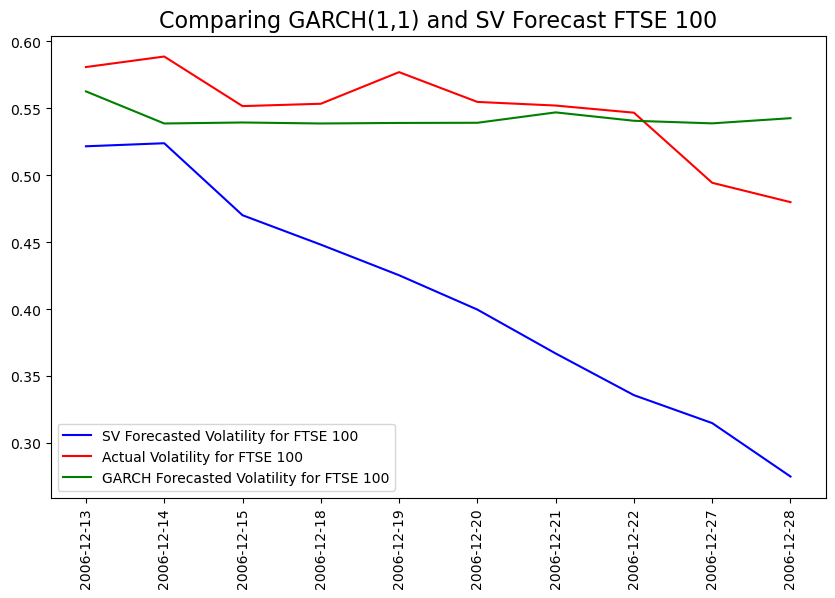

In [295]:
# Plot the forecasted and actual volatility

plt.figure(figsize=(10, 6))
plt.plot(FTSE_test.index, FTSE_percentage_forecasted, label='SV Forecasted Volatility for FTSE 100', color='blue')
#plt.plot(FTSE_test.index, FTSE_percentage_Actual, label='log volatility to actual volatility')
plt.plot(FTSE_test.index, FTSE.Volatility[-test_size1:], label='Actual Volatility for FTSE 100', color='red')
plt.plot(FTSE_test.index, rolling_predictions2, label='GARCH Forecasted Volatility for FTSE 100', color='green')
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Comparing GARCH(1,1) and SV Forecast FTSE 100', fontsize=16)
plt.show()

In [296]:
mse = mean_squared_error(FTSE_percentage_Actual, FTSE_percentage_forecasted)
print("SV Mean Squared Error (MSE) FTSE 100:", mse)
rmse = root_mean_squared_error(FTSE_percentage_Actual, FTSE_percentage_forecasted)
print("SV Root Mean Squared Error (RMSE) FTSE 100:", rmse)
mae = mean_absolute_error(FTSE_percentage_Actual, FTSE_percentage_forecasted)
print("SV Mean Absolute Error (MAE) FTSE 100:", mae)

SV Mean Squared Error (MSE) FTSE 100: 0.02296557043511016
SV Root Mean Squared Error (RMSE) FTSE 100: 0.15154395545553825
SV Mean Absolute Error (MAE) FTSE 100: 0.14144057285166767


In [297]:
mse = mean_squared_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("GARCH(1,1) Mean Squared Error (MSE) FTSE 100:", mse)
rmse = root_mean_squared_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("GARCH(1,1) Root Mean Squared Error (RMSE) FTSE 100:", rmse)
mae = mean_absolute_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("GARCH(1,1) Mean Absolute Error (MAE) FTSE 100:", mae)

GARCH(1,1) Mean Squared Error (MSE) FTSE 100: 0.0010843503300117592
GARCH(1,1) Root Mean Squared Error (RMSE) FTSE 100: 0.03292947509468924
GARCH(1,1) Mean Absolute Error (MAE) FTSE 100: 0.026689965200674542
